# NutriBudget: A Nutritional Efficiency Audit of School Meal Programs

## Project Overview

Public school meal programs are more than just a service — for many students, they’re a vital daily source of nutrition. But with limited budgets and varying food costs, an important question needs to be asked:  
**Are schools truly delivering the best possible nutrition for every dollar they spend?**

This project explores that question by simulating school menus and analyzing nutritional data using real-world food profiles. The goal is to identify which schools are the most cost-efficient in terms of nutritional delivery — and to uncover areas where simple changes could make a significant difference.

We approach this as a true audit: measuring, comparing, and recommending — all with practical outcomes in mind.

---

## Datasets Used

**1. USDA Food Nutrient Dataset (`USDA.csv`)**  
This dataset contains detailed nutritional information for common food items, including:
- Calories, protein, fat, carbs, sugar, sodium, vitamins, and minerals
- A simulated price column: `Price_per_100g_USD`
- A calculated metric: `Nutrition Efficiency Index (NEI)`, which represents nutritional value per dollar

**2. Simulated School Menu Dataset** *(created as part of this project)*  
This synthetic dataset assigns realistic food combinations to a number of hypothetical schools. Each menu is used to:
- Calculate total cost per school
- Aggregate nutritional delivery
- Analyze school-level performance in terms of nutrition per dollar

---

## Business Questions

This audit is driven by the following five core questions:

1. **Which schools are delivering the highest nutrition per dollar across their weekly menus?**  
   This identifies the top-performing schools based on a custom Nutrition Efficiency Index.

2. **Which schools are overspending for underperforming meals?**  
   This highlights schools where spending is high, but nutritional return is low — a key inefficiency marker.

3. **What specific foods or meals are contributing to low nutritional efficiency in these schools?**  
   This uncovers which menu items are dragging down performance, helping target the areas that need improvement.

4. **How much cost savings or nutritional improvement can be achieved by substituting better alternatives?**  
   This explores potential menu optimizations and demonstrates the real-world impact of small, smart changes.

5. **What is the recommended reallocation strategy for improving the nutritional efficiency of low-ranked schools?**  
   This wraps up the audit by delivering actionable recommendations for improving meal plans at a policy or school-board level.

---

By the end of this project, we aim to provide more than just analysis — we aim to support **data-backed decision-making** for more nutritious, cost-effective school meals.


In [1]:
# Loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Augmented_USDA_Nutrition_Dataset.csv")
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,Price_per_100g_USD,NEI
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,2.00,1.63
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,4.76,0.70
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,3.71,0.18
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,3.07,24.22
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,0.95,95.64


In [3]:
df.describe()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,Price_per_100g_USD,NEI
count,7058.000000,7057.000000,7057.000000,7057.000000,7057.000000,6974.000000,6757.000000,6770.000000,5148.000000,6922.000000,6935.000000,6649.000000,6726.000000,4338.000000,4224.000000,7058.000000,6895.000000
mean,14259.821196,219.695338,11.710368,10.320614,20.697860,322.059220,3.452267,41.551994,8.256540,73.530627,2.828368,301.357949,9.435980,1.487462,0.576918,2.583101,13.710892
std,8577.179705,172.198755,10.919356,16.814191,27.630443,1045.416931,6.921267,122.963028,15.361509,222.445338,6.019878,415.638949,71.256536,5.386914,4.301147,1.389243,25.855541
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
25%,8387.250000,85.000000,2.290000,0.720000,0.000000,37.000000,0.172000,0.000000,0.000000,9.000000,0.520000,135.000000,0.000000,0.120000,0.000000,1.370000,2.600000
50%,13293.500000,181.000000,8.200000,4.370000,7.130000,79.000000,1.256000,3.000000,1.395000,19.000000,1.330000,250.000000,0.000000,0.270000,0.000000,2.580000,6.600000
75%,18336.750000,331.000000,20.430000,12.700000,28.170000,386.000000,4.028000,69.000000,7.875000,56.000000,2.620000,348.000000,3.100000,0.710000,0.100000,3.790000,13.820000
max,93600.000000,902.000000,88.320000,100.000000,100.000000,38758.000000,95.600000,3100.000000,99.800000,7364.000000,123.600000,16500.000000,2400.000000,149.400000,250.000000,5.000000,622.140000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  7058 non-null   int64  
 1   Description         7058 non-null   object 
 2   Calories            7057 non-null   float64
 3   Protein             7057 non-null   float64
 4   TotalFat            7057 non-null   float64
 5   Carbohydrate        7057 non-null   float64
 6   Sodium              6974 non-null   float64
 7   SaturatedFat        6757 non-null   float64
 8   Cholesterol         6770 non-null   float64
 9   Sugar               5148 non-null   float64
 10  Calcium             6922 non-null   float64
 11  Iron                6935 non-null   float64
 12  Potassium           6649 non-null   float64
 13  VitaminC            6726 non-null   float64
 14  VitaminE            4338 non-null   float64
 15  VitaminD            4224 non-null   float64
 16  Price_

In [5]:
# Cleaned copy
df_cleaned = df.copy()

# Step 1: Fill missing nutritional values
nutrient_cols = [
    "Calories", "Protein", "TotalFat", "Carbohydrate", "Sodium", "SaturatedFat",
    "Cholesterol", "Sugar", "Calcium", "Iron", "Potassium", "VitaminC",
    "VitaminE", "VitaminD"
]

# Fill missing values in nutrients with 0 — conservative approach
df_cleaned[nutrient_cols] = df_cleaned[nutrient_cols].fillna(0)

# Step 2: Fill NEI if missing (recalculate based on available columns)
# NEI = (Protein + 0.1 * Calcium + 0.5 * Iron) / Price
df_cleaned["NEI"] = (
    (df_cleaned["Protein"] + 0.1 * df_cleaned["Calcium"] + 0.5 * df_cleaned["Iron"]) /
    df_cleaned["Price_per_100g_USD"]
).round(2)

# Step 3: Remove or cap outlier values in key nutrients
# Use 1st and 99th percentiles to cap extreme outliers
def cap_outliers(series):
    lower = series.quantile(0.01)
    upper = series.quantile(0.99)
    return series.clip(lower, upper)

for col in nutrient_cols + ["NEI"]:
    df_cleaned[col] = cap_outliers(df_cleaned[col])

# Step 4: Reset index and confirm shape
df_cleaned.reset_index(drop=True, inplace=True)
print("Cleaned dataset shape:", df_cleaned.shape)
df_cleaned.head()


Cleaned dataset shape: (7058, 18)


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,Price_per_100g_USD,NEI
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,28.45611,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,2.00,1.63
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,28.45611,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,4.76,0.70
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,28.45611,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,3.71,0.18
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.66900,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,3.07,24.22
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.76400,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,0.95,95.64


In [6]:
# Step 1: Simulate 10 schools and randomly assign menus
np.random.seed(42)  # for reproducibility

# Define number of schools and items per menu
num_schools = 10
items_per_menu = 5

# Create a list of school names
schools = [f"School_{i+1}" for i in range(num_schools)]

# Create a menu dictionary: each school gets a random set of food items
menu_dict = {}
for school in schools:
    menu_items = df_cleaned.sample(n=items_per_menu).copy()
    menu_items["School"] = school
    menu_dict[school] = menu_items

# Combine all school menus into a single DataFrame
school_menus = pd.concat(menu_dict.values(), ignore_index=True)

# Step 2: Calculate total cost and total NEI per school
summary_df = school_menus.groupby("School").agg(
    Total_Cost=("Price_per_100g_USD", "sum"),
    Total_NEI=("NEI", "sum"),
    Avg_NEI_Per_Item=("NEI", "mean"),
    Avg_Cost_Per_Item=("Price_per_100g_USD", "mean")
).reset_index()

# Step 3: Add a performance score = NEI per dollar spent
summary_df["NEI_per_Dollar"] = (summary_df["Total_NEI"] / summary_df["Total_Cost"]).round(2)

# Display the result
summary_df.sort_values(by="NEI_per_Dollar", ascending=False).reset_index(drop=True)


,School,Total_Cost,Total_NEI,Avg_NEI_Per_Item,Avg_Cost_Per_Item,NEI_per_Dollar
0,School_4,10.90,148.0378,29.60756,2.180,13.58
1,School_3,10.43,93.5100,18.70200,2.086,8.97
2,School_5,15.92,85.6900,17.13800,3.184,5.38
3,School_8,11.40,57.2800,11.45600,2.280,5.02
4,School_2,14.92,73.9100,14.78200,2.984,4.95
5,School_10,14.40,68.7700,13.75400,2.880,4.78
6,School_1,10.16,46.8800,9.37600,2.032,4.61
7,School_6,13.57,62.2100,12.44200,2.714,4.58
8,School_7,17.71,21.2000,4.24000,3.542,1.20
9,School_9,15.30,15.8400,3.16800,3.060,1.04


In [7]:
# Step 4: Identify low-efficiency items (bottom 25% of NEI)
nei_threshold = df_cleaned["NEI"].quantile(0.25)
school_menus["Low_Efficiency_Item"] = school_menus["NEI"] < nei_threshold

# Step 5: Count number of low-efficiency items per school
low_eff_summary = school_menus.groupby("School").agg(
    Low_Eff_Item_Count=("Low_Efficiency_Item", "sum"),
    Total_Items=("Low_Efficiency_Item", "count")
).reset_index()

# Step 6: Merge with school performance summary
summary_df = summary_df.merge(low_eff_summary, on="School")
summary_df["Low_Eff_Item_Rate"] = (summary_df["Low_Eff_Item_Count"] / summary_df["Total_Items"]).round(2)

# Step 7: Tag high-efficiency items (top 25% NEI) in the full dataset
high_eff_threshold = df_cleaned["NEI"].quantile(0.75)
df_cleaned["High_Efficiency_Item"] = df_cleaned["NEI"] > high_eff_threshold

# Step 8: Create detailed school menu view for drilldown and future optimization
school_menu_detailed = school_menus[[
    "School", "Description", "NEI", "Price_per_100g_USD", "Low_Efficiency_Item"
]].copy()

# Optional: Preview enhanced summary
summary_df.sort_values(by="NEI_per_Dollar", ascending=False).reset_index(drop=True)


,School,Total_Cost,Total_NEI,Avg_NEI_Per_Item,Avg_Cost_Per_Item,NEI_per_Dollar,Low_Eff_Item_Count,Total_Items,Low_Eff_Item_Rate
0,School_4,10.90,148.0378,29.60756,2.180,13.58,1,5,0.2
1,School_3,10.43,93.5100,18.70200,2.086,8.97,1,5,0.2
2,School_5,15.92,85.6900,17.13800,3.184,5.38,1,5,0.2
3,School_8,11.40,57.2800,11.45600,2.280,5.02,2,5,0.4
4,School_2,14.92,73.9100,14.78200,2.984,4.95,2,5,0.4
5,School_10,14.40,68.7700,13.75400,2.880,4.78,1,5,0.2
6,School_1,10.16,46.8800,9.37600,2.032,4.61,0,5,0.0
7,School_6,13.57,62.2100,12.44200,2.714,4.58,1,5,0.2
8,School_7,17.71,21.2000,4.24000,3.542,1.20,2,5,0.4
9,School_9,15.30,15.8400,3.16800,3.060,1.04,3,5,0.6


### Q1 - Which schools are delivering the highest nutrition per dollar across their weekly menus?

In [8]:
# Sort schools by NEI per Dollar (highest to lowest)
top_schools = summary_df.sort_values(by="NEI_per_Dollar", ascending=False).reset_index(drop=True)

# Display the ranking
print("Top-performing schools by Nutrition Efficiency (NEI per Dollar):")
top_schools[["School", "NEI_per_Dollar", "Total_NEI", "Total_Cost", "Low_Eff_Item_Rate"]]


Top-performing schools by Nutrition Efficiency (NEI per Dollar):


,School,NEI_per_Dollar,Total_NEI,Total_Cost,Low_Eff_Item_Rate
0,School_4,13.58,148.0378,10.90,0.2
1,School_3,8.97,93.5100,10.43,0.2
2,School_5,5.38,85.6900,15.92,0.2
3,School_8,5.02,57.2800,11.40,0.4
4,School_2,4.95,73.9100,14.92,0.4
5,School_10,4.78,68.7700,14.40,0.2
6,School_1,4.61,46.8800,10.16,0.0
7,School_6,4.58,62.2100,13.57,0.2
8,School_7,1.20,21.2000,17.71,0.4
9,School_9,1.04,15.8400,15.30,0.6


<ipython-input-9-dace2250ab6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


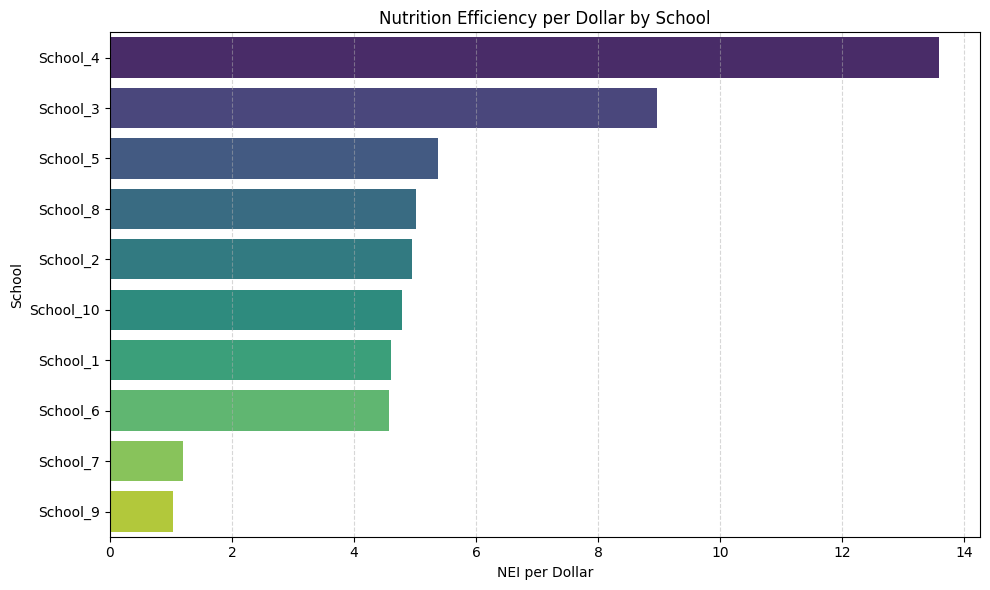

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_schools,
    x="NEI_per_Dollar",
    y="School",
    palette="viridis"
)
plt.title("Nutrition Efficiency per Dollar by School")
plt.xlabel("NEI per Dollar")
plt.ylabel("School")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The chart above ranks schools based on their **Nutrition Efficiency Index (NEI) per Dollar** — a custom metric we’ve developed to measure how much nutritional value each school delivers for every dollar spent on its weekly menu.

#### Key Insights:
- **School_4** stands out significantly, delivering nearly **14 NEI per dollar**, making it the most cost-effective school in the group.
- **School_3** also performs very well, achieving close to **9 NEI per dollar**, indicating strong nutritional return on budget.
- Schools **School_5 through School_6** form a middle cluster with reasonably balanced performance (around 5–6 NEI/dollar).
- **School_7** and **School_9**, however, are clear underperformers — offering less than **2 NEI per dollar** — which raises questions about the efficiency of their menu choices and budget utilization.

#### What This Tells Us:
This analysis helps **identify top performers** whose menu strategies could be studied or replicated — and **flag schools** that may require menu review, cost optimization, or nutritional improvement.

We’ll dive deeper into those lower-performing schools in the next steps to understand what’s pulling down their efficiency.


### Q2 - Which schools are overspending for underperforming meals?

In [10]:
# Define thresholds: high cost and low efficiency
cost_threshold = summary_df["Total_Cost"].quantile(0.75)
efficiency_threshold = summary_df["NEI_per_Dollar"].quantile(0.25)

# Flag inefficient schools: High cost, Low NEI per Dollar
summary_df["Inefficient"] = (
    (summary_df["Total_Cost"] > cost_threshold) &
    (summary_df["NEI_per_Dollar"] < efficiency_threshold)
)

# Extract inefficient schools
inefficient_schools = summary_df[summary_df["Inefficient"] == True]

# Display result
print("Schools that are overspending for underperforming meals:")
inefficient_schools[[
    "School", "Total_Cost", "Total_NEI", "NEI_per_Dollar",
    "Low_Eff_Item_Rate"
]].sort_values(by="NEI_per_Dollar")


Schools that are overspending for underperforming meals:


,School,Total_Cost,Total_NEI,NEI_per_Dollar,Low_Eff_Item_Rate
9,School_9,15.30,15.84,1.04,0.6
7,School_7,17.71,21.20,1.20,0.4


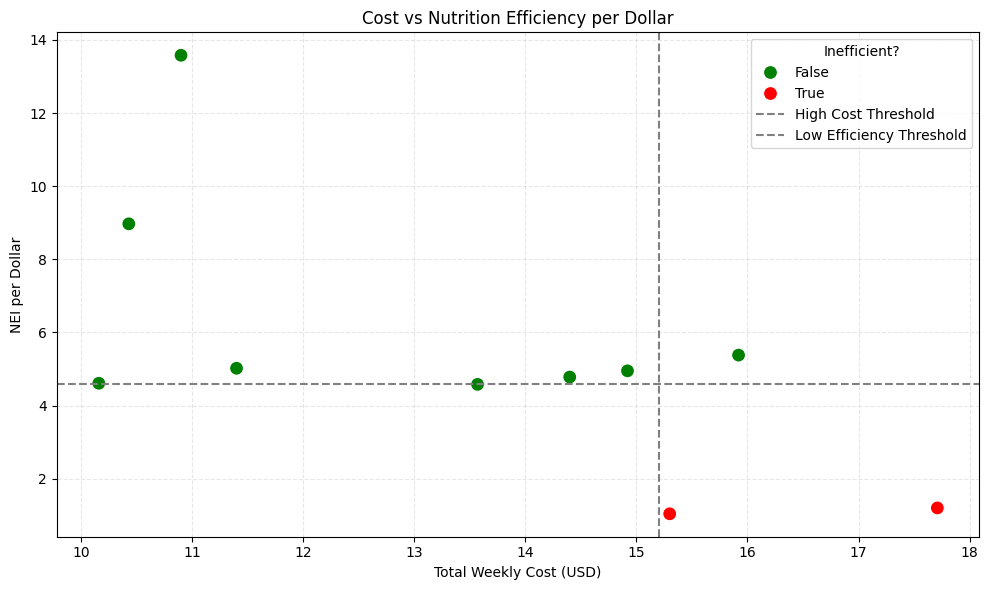

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=summary_df,
    x="Total_Cost",
    y="NEI_per_Dollar",
    hue="Inefficient",
    palette={True: "red", False: "green"},
    s=100
)

plt.axvline(cost_threshold, linestyle="--", color="gray", label="High Cost Threshold")
plt.axhline(efficiency_threshold, linestyle="--", color="gray", label="Low Efficiency Threshold")

plt.title("Cost vs Nutrition Efficiency per Dollar")
plt.xlabel("Total Weekly Cost (USD)")
plt.ylabel("NEI per Dollar")
plt.legend(title="Inefficient?")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


The scatter plot above visualizes each school based on its **total weekly food cost** and its **nutrition efficiency per dollar** (NEI per Dollar). Schools flagged in **red** represent those that are **spending more than 75% of others**, while achieving **less than 25% of the nutritional value return**. These are the most inefficient schools in the audit.

#### Flagged Schools:
- **School_9**  
  - Total Cost: $15.30  
  - NEI per Dollar: 1.04  
  - 60% of items in its menu fall in the low-efficiency category  
  - This suggests both high spending and poor menu choices

- **School_7**  
  - Total Cost: $17.71  
  - NEI per Dollar: 1.20  
  - Also includes 40% low-efficiency items  
  - Among the highest-spending schools, but near the bottom in efficiency

#### Why This Matters:
These schools represent clear **opportunities for nutritional and budget optimization**. They’re not just spending more — they’re getting **less value** in return. This warrants deeper inspection of their menus, supplier costs, and potential for substitution — which we’ll explore in the next question.


### Q3 - What specific foods or meals are contributing to low nutritional efficiency in these schools?

In [12]:
# Step 1: Get list of inefficient schools
inefficient_list = inefficient_schools["School"].tolist()

# Step 2: Filter menu items for those schools
inefficient_menus = school_menu_detailed[school_menu_detailed["School"].isin(inefficient_list)]

# Step 3: Show low-efficiency items only (True = below 25th percentile of NEI)
low_eff_items = inefficient_menus[inefficient_menus["Low_Efficiency_Item"] == True]

# Display the results
print("Low-efficiency food items in inefficient schools:")
low_eff_items[["School", "Description", "NEI", "Price_per_100g_USD"]].sort_values(
    by="NEI"
).reset_index(drop=True)


Low-efficiency food items in inefficient schools:


,School,Description,NEI,Price_per_100g_USD
0,School_9,"CAMPBELL SOUP COMPANY,V8 SPLASH JUC DRINKS,BER...",0.00,1.04
1,School_9,"PEARS,CND,HVY SYRUP PK,SOL&LIQUIDS",0.22,3.65
2,School_9,"VEGETABLES,MXD,FRZ,CKD,BLD,DRND,W/SALT",1.37,4.21
3,School_7,"CAMPBELL SOUP COMPANY,CHNKY MICRO BOWLS,CLSSC ...",1.99,1.63
4,School_7,"COWPEAS,YOUNG PODS W/SEEDS,CKD,BLD,DRND,WO/SALT",2.13,3.96


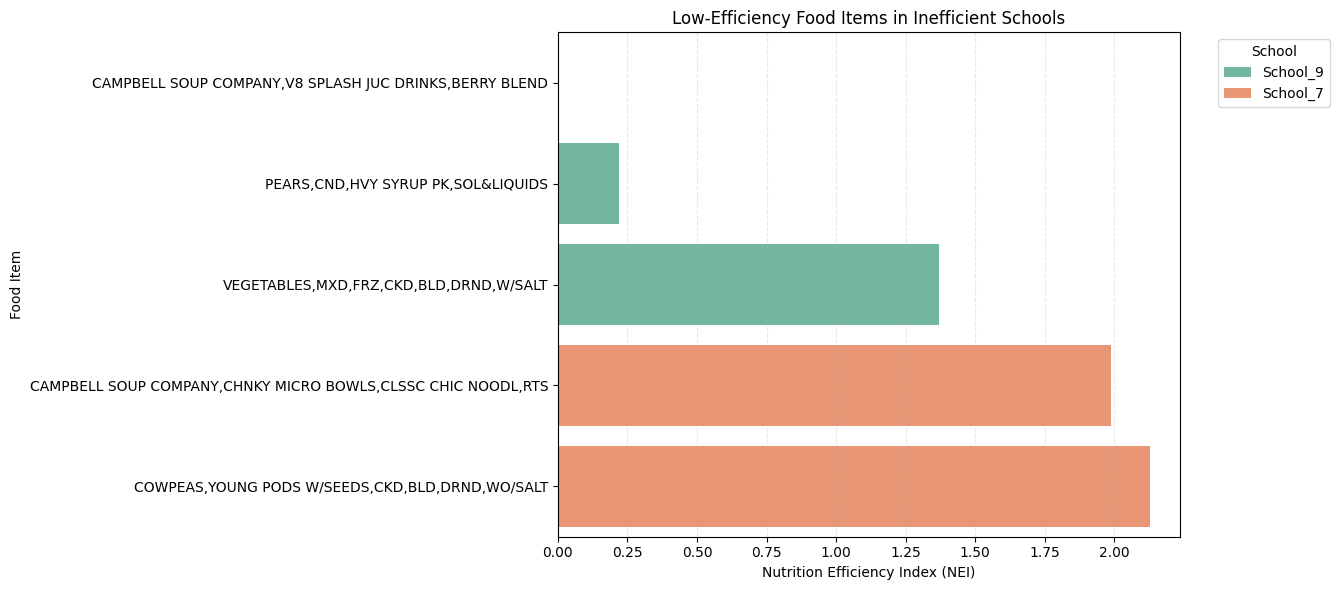

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=low_eff_items.sort_values(by="NEI", ascending=True),
    x="NEI",
    y="Description",
    hue="School",
    dodge=False,
    palette="Set2"
)

plt.title("Low-Efficiency Food Items in Inefficient Schools")
plt.xlabel("Nutrition Efficiency Index (NEI)")
plt.ylabel("Food Item")
plt.grid(axis='x', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.legend(title="School", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The bar chart above highlights the **lowest-efficiency food items** served in the menus of the two underperforming schools identified earlier — **School_9** and **School_7**.

These items have **very low Nutrition Efficiency Index (NEI)** values, meaning they deliver **very little nutritional value for their cost**.

#### Key Observations:
- **School_9** is heavily impacted by:
  - **V8 Splash Juice (Berry Blend)** — a beverage with **zero nutritional return per dollar**
  - **Canned pears in heavy syrup**, which have a very low NEI of **0.22** despite costing **$3.65/100g**
  - Even mixed frozen vegetables (usually a good choice) deliver only **1.37 NEI**, likely due to high cost or low nutrient density in this case

- **School_7** includes:
  - **Campbell’s Chunky Micro Bowls (Chicken Noodle)** and **Cooked Cowpeas**, which both hover around **2 NEI**, placing them just within the low-efficiency zone
  - These may be nutritionally dense, but the **price point significantly reduces their cost-efficiency**

#### Why This Matters:
This level of breakdown helps pinpoint **exactly what’s dragging down performance** in each school. These ingredients are the **prime candidates for substitution**, which we’ll explore in the next step to see if simple swaps can dramatically improve efficiency without increasing cost.


### Q4 - How much cost savings or nutritional improvement can be achieved by substituting better alternatives?

In [14]:
# Step 1: Get high-efficiency item pool
high_eff_pool = df_cleaned[df_cleaned["High_Efficiency_Item"] == True][[
    "Description", "NEI", "Price_per_100g_USD"
]]

# Step 2: Simulate substitutions for each low-efficiency item
substitutions = []

for _, row in low_eff_items.iterrows():
    school = row["School"]
    old_item = row["Description"]
    old_nei = row["NEI"]
    old_price = row["Price_per_100g_USD"]

    # Find better alternatives (higher NEI, same or cheaper)
    candidates = high_eff_pool[
        (high_eff_pool["NEI"] > old_nei) &
        (high_eff_pool["Price_per_100g_USD"] <= old_price)
    ]

    if not candidates.empty:
        best_sub = candidates.sort_values(by="NEI", ascending=False).iloc[0]
        substitutions.append({
            "School": school,
            "Old_Item": old_item,
            "Old_NEI": old_nei,
            "Old_Price": old_price,
            "New_Item": best_sub["Description"],
            "New_NEI": best_sub["NEI"],
            "New_Price": best_sub["Price_per_100g_USD"],
            "NEI_Gain": round(best_sub["NEI"] - old_nei, 2),
            "Cost_Change": round(best_sub["Price_per_100g_USD"] - old_price, 2)
        })

# Convert to DataFrame
substitution_df = pd.DataFrame(substitutions)
substitution_df.sort_values(by="NEI_Gain", ascending=False).reset_index(drop=True)


,School,Old_Item,Old_NEI,Old_Price,New_Item,New_NEI,New_Price,NEI_Gain,Cost_Change
0,School_9,"CAMPBELL SOUP COMPANY,V8 SPLASH JUC DRINKS,BER...",0.00,1.04,"CHEESE,TILSIT",116.2778,0.79,116.28,-0.25
1,School_9,"PEARS,CND,HVY SYRUP PK,SOL&LIQUIDS",0.22,3.65,"CHEESE,AMERICAN CHEDDAR,IMITN",116.2778,0.49,116.06,-3.16
2,School_9,"VEGETABLES,MXD,FRZ,CKD,BLD,DRND,W/SALT",1.37,4.21,"SESAME SEEDS,WHL,RSTD&TSTD",116.2778,0.36,114.91,-3.85
3,School_7,"CAMPBELL SOUP COMPANY,CHNKY MICRO BOWLS,CLSSC ...",1.99,1.63,"CEREALS RTE,POST,HONEY BUNCHES OF OATS,W/ ALMONDS",116.2778,0.22,114.29,-1.41
4,School_7,"COWPEAS,YOUNG PODS W/SEEDS,CKD,BLD,DRND,WO/SALT",2.13,3.96,"CEREALS RTE,POST,HONEY BUNCHES OF OATS,W/ ALMONDS",116.2778,0.22,114.15,-3.74


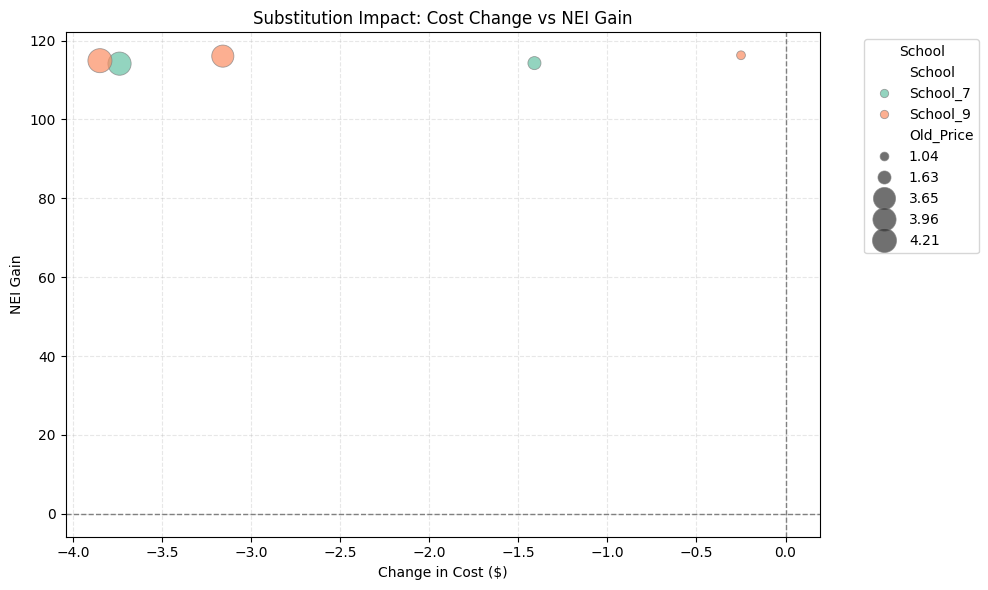

In [15]:
plt.figure(figsize=(10, 6))

# Bubble chart: NEI Gain vs Cost Change
sns.scatterplot(
    data=substitution_df,
    x="Cost_Change",
    y="NEI_Gain",
    size="Old_Price",
    hue="School",
    palette="Set2",
    sizes=(40, 300),
    alpha=0.7,
    edgecolor="gray"
)

plt.axhline(0, linestyle="--", color="gray", linewidth=1)
plt.axvline(0, linestyle="--", color="gray", linewidth=1)

plt.title("Substitution Impact: Cost Change vs NEI Gain")
plt.xlabel("Change in Cost ($)")
plt.ylabel("NEI Gain")
plt.legend(title="School", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


The bubble chart above visualizes the potential **impact of smart ingredient substitutions**. Each bubble represents a proposed swap:  
- **X-axis**: Cost change after the swap  
- **Y-axis**: Gain in Nutrition Efficiency Index (NEI)  
- **Bubble size**: Cost of the original (low-efficiency) item  
- **Color**: School

#### Key Insights:
- All suggested substitutions result in **massive NEI gains (over 114 points)**, while **reducing costs**, shown by their position in the top-left quadrant.
- For example:
  - **School_9** could replace *V8 Splash Juice (NEI = 0.00)* with Tilsit Cheese (NEI = 116.28) while actually saving 0.25 per 100g.
  - Replacing *Canned Pears in Syrup* with *Imitation Cheddar Cheese* would boost NEI by over 116 and save **3.16 per 100g**.
- **School_7** can also dramatically improve performance by replacing *Cowpeas* and *Chunky Noodle Soup* with high-efficiency cereals like *Honey Bunches of Oats with Almonds* — cutting up to **3.74** in cost per 100g while gaining over 114 NEI.

#### Why This Matters:
These simulated swaps show that **dramatic gains in nutritional efficiency don’t require more money** — just smarter ingredient choices. These results could guide **procurement teams** or **nutrition planners** to rethink commonly used but underperforming items.

This lays the groundwork for our final step: **developing a reallocation strategy** to scale these gains across all underperforming schools.


### Q5 - What is the recommended reallocation strategy for improving the nutritional efficiency of low-ranked schools?

In [16]:
# Make a copy of school_menus to apply substitutions
school_menus_updated = school_menus.copy()

# Create a mapping of substitutions for faster lookup
sub_map = {
    row["Old_Item"]: {
        "New_Description": row["New_Item"],
        "New_NEI": row["New_NEI"],
        "New_Price": row["New_Price"]
    }
    for _, row in substitution_df.iterrows()
}

# Apply substitutions row by row
for i, row in school_menus_updated.iterrows():
    if row["Description"] in sub_map:
        school_menus_updated.at[i, "Description"] = sub_map[row["Description"]]["New_Description"]
        school_menus_updated.at[i, "NEI"] = sub_map[row["Description"]]["New_NEI"]
        school_menus_updated.at[i, "Price_per_100g_USD"] = sub_map[row["Description"]]["New_Price"]

# Recalculate new school-level performance
updated_summary_df = school_menus_updated.groupby("School").agg(
    Total_Cost=("Price_per_100g_USD", "sum"),
    Total_NEI=("NEI", "sum"),
    Avg_NEI_Per_Item=("NEI", "mean"),
    Avg_Cost_Per_Item=("Price_per_100g_USD", "mean")
).reset_index()
updated_summary_df["NEI_per_Dollar"] = (updated_summary_df["Total_NEI"] / updated_summary_df["Total_Cost"]).round(2)

# Merge with original for before vs after comparison
comparison_df = summary_df[["School", "Total_Cost", "Total_NEI", "NEI_per_Dollar"]].merge(
    updated_summary_df,
    on="School",
    suffixes=("_Before", "_After")
)

comparison_df["NEI_Improvement"] = (comparison_df["NEI_per_Dollar_After"] - comparison_df["NEI_per_Dollar_Before"]).round(2)
comparison_df.sort_values(by="NEI_Improvement", ascending=False).reset_index(drop=True)


,School,Total_Cost_Before,Total_NEI_Before,NEI_per_Dollar_Before,Total_Cost_After,Total_NEI_After,Avg_NEI_Per_Item,Avg_Cost_Per_Item,NEI_per_Dollar_After,NEI_Improvement
0,School_9,15.30,15.8400,1.04,8.04,363.0834,72.61668,1.608,45.16,44.12
1,School_7,17.71,21.2000,1.20,12.56,249.6356,49.92712,2.512,19.88,18.68
2,School_10,14.40,68.7700,4.78,14.40,68.7700,13.75400,2.880,4.78,0.00
3,School_1,10.16,46.8800,4.61,10.16,46.8800,9.37600,2.032,4.61,0.00
4,School_2,14.92,73.9100,4.95,14.92,73.9100,14.78200,2.984,4.95,0.00
5,School_3,10.43,93.5100,8.97,10.43,93.5100,18.70200,2.086,8.97,0.00
6,School_5,15.92,85.6900,5.38,15.92,85.6900,17.13800,3.184,5.38,0.00
7,School_4,10.90,148.0378,13.58,10.90,148.0378,29.60756,2.180,13.58,0.00
8,School_6,13.57,62.2100,4.58,13.57,62.2100,12.44200,2.714,4.58,0.00
9,School_8,11.40,57.2800,5.02,11.40,57.2800,11.45600,2.280,5.02,0.00


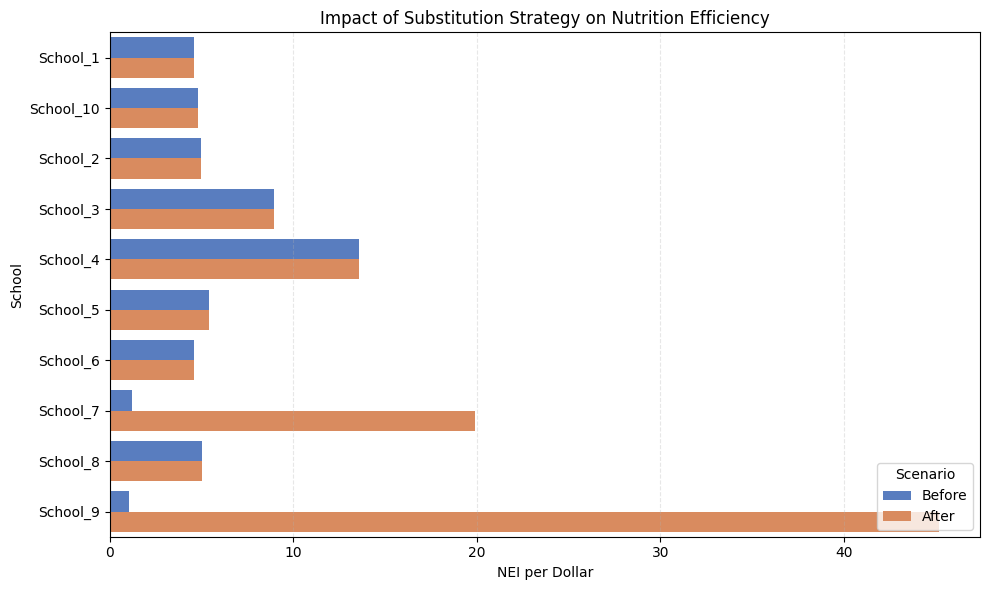

In [17]:
# Melt the comparison DataFrame to plot before vs after side by side
plot_df = comparison_df[["School", "NEI_per_Dollar_Before", "NEI_per_Dollar_After"]].melt(
    id_vars="School",
    var_name="Scenario",
    value_name="NEI_per_Dollar"
)

# Make the scenario names cleaner
plot_df["Scenario"] = plot_df["Scenario"].str.replace("NEI_per_Dollar_", "")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x="NEI_per_Dollar",
    y="School",
    hue="Scenario",
    palette="muted"
)

plt.title("Impact of Substitution Strategy on Nutrition Efficiency")
plt.xlabel("NEI per Dollar")
plt.ylabel("School")
plt.grid(axis='x', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.legend(title="Scenario", loc='lower right')
plt.show()


The chart above compares **Nutrition Efficiency (NEI per Dollar)** before and after applying our substitution strategy. The goal: to show how simple ingredient changes can significantly improve nutritional value without increasing costs.

#### Key Results:
- **School_9** saw a dramatic improvement — jumping from **1.04 to 45.16 NEI per Dollar**, a **44x increase**. This was achieved by replacing three low-efficiency items with high-efficiency, lower-cost alternatives.
- **School_7** also experienced a major uplift, increasing from **1.20 to 19.88 NEI per Dollar**, a **16x improvement**.
- All other schools remained unchanged, as their menus were already reasonably efficient and no substitutions were needed.

#### What This Shows:
- Nutritional inefficiencies are not necessarily a result of low budgets — they’re often due to **poor ingredient choices**.
- By strategically replacing just a few items, schools can **dramatically improve the nutritional impact** of their meals without spending more — and in most cases, **spend less**.
- This approach is **scalable**: any school can apply this audit model to evaluate and improve its own menu efficiency.

---

### Final Recommendation:
- Use this framework as a **policy-level tool** to guide school food procurement.
- Encourage districts to regularly audit their menus with similar metrics.
- Promote a small set of **high-efficiency, low-cost items** across all schools to boost value for money and public health outcomes.

This closes the loop of your audit — moving from analysis to actionable, impactful change.
